# Load model and predicted

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/destree.pkl', 'rb') as model_file:
    destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/ranfor.pkl', 'rb') as model_file:
    ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/gbc.pkl', 'rb') as model_file:
    gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/xgb.pkl', 'rb') as model_file:
    xgb = pickle.load(model_file)

In [3]:
# load the decision tree trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_destree.pkl', 'rb') as model_file:
    p_test_destree = pickle.load(model_file)

# load the random forest trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_ranfor.pkl', 'rb') as model_file:
    p_test_ranfor = pickle.load(model_file)

# load the gradient boosting trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_gbc.pkl', 'rb') as model_file:
    p_test_gbc = pickle.load(model_file)

# load the xgboost trained model
with open('/Data/Visual Studio Code/Data Science/Notebook/UNSW-NB15/Imbalanced/Saved/p_test_xgb.pkl', 'rb') as model_file:
    p_test_xgb = pickle.load(model_file)

# Load Test Data

In [4]:
data_test = pd.read_csv('/Data/Visual Studio Code/Data Science/Dataset/UNSW-NB15/UNSW_NB15_testing-set.csv')

data_test.dropna(inplace=True)
data_test.drop_duplicates(inplace=True)

data_test_attack = data_test[data_test['label'] == 1]

# Encode Test Data

In [5]:
le = LabelEncoder()
#Encode attack_cat
data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])

#Encode state
data_test_attack['state'] = le.fit_transform(data_test_attack['state'])

#Encode service
data_test_attack['service'] = le.fit_transform(data_test_attack['service'])

#Encode proto
data_test_attack['proto'] = le.fit_transform(data_test_attack['proto'])

data_test_attack.dtypes

C:\Users\Acer\AppData\Local\Temp\ipykernel_19776\2007079091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['attack_cat'] = le.fit_transform(data_test_attack['attack_cat'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19776\2007079091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_attack['state'] = le.fit_transform(data_test_attack['state'])
C:\Users\Acer\AppData\Local\Temp\ipykernel_19776\2007079091.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

id                     int64
dur                  float64
proto                  int32
service                int32
state                  int32
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_l

# Model Evaluation

In [6]:
#Holder to store model performance
from sklearn import metrics
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to storing the results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 5))
    f1_score.append(round(b, 5))
    recall.append(round(c, 5))
    precision.append(round(d, 5))

In [7]:
#function to computing performance and computing performance using classification report, then stroing the results
def model_report(modelName, y_test, p_test):
    print("Model:{}\n".format(modelName))

    #computing accuracy score
    acc_test = metrics.accuracy_score(y_test, p_test)
    print("Accuracy on test Data: {:.5f}\n".format(acc_test))

    #computing f1 score
    f1_score_test = metrics.f1_score(y_test, p_test, average='macro')
    print("F1 score on test Data: {:.5f}\n".format(f1_score_test))

    #computing recall score
    recall_score_test = metrics.recall_score(y_test, p_test, average='macro')
    print("Recall score on test Data: {:.5f}\n".format(recall_score_test))

    #computing precision score
    precision_score_test = metrics.precision_score(y_test, p_test, average='macro')
    print("Precision on test Data: {:.5f}\n".format(precision_score_test))

    #computing classification report of model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))

    #storing results
    storeResults(modelName, acc_test, f1_score_test, recall_score_test, precision_score_test)

## Prepare X_test and y_test

In [8]:
#Prepare X_test and y_test
X_test = data_test_attack.drop(columns=['attack_cat', 'id', 'dinpkt', 'ct_ftp_cmd', 'ct_src_dport_ltm', 'is_sm_ips_ports', 'label'])
y_test = data_test_attack["attack_cat"]

X_test.shape, y_test.shape

((119341, 38), (119341,))

## Training, Testing, Evaluation

### Decision Tree

In [9]:
#call report function
model_report(str(destree), y_test, p_test_destree)

Model:DecisionTreeClassifier(max_depth=9)

Accuracy on test Data: 0.76514

F1 score on test Data: 0.48287

Recall score on test Data: 0.48066

Precision on test Data: 0.56122

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.66      0.06      0.11      1746
           2       0.34      0.62      0.44     12264
           3       0.72      0.64      0.67     33393
           4       0.91      0.81      0.86     18184
           5       0.97      0.98      0.97     40000
           6       0.88      0.74      0.80     10491
           7       0.49      0.47      0.48      1133
           8       0.09      0.01      0.01       130

    accuracy                           0.77    119341
   macro avg       0.56      0.48      0.48    119341
weighted avg       0.79      0.77      0.77    119341



### Random Forest

In [10]:
#call report function
model_report(str(ranfor), y_test, p_test_ranfor)

Model:RandomForestClassifier(n_estimators=10)

Accuracy on test Data: 0.77422

F1 score on test Data: 0.51877

Recall score on test Data: 0.50578

Precision on test Data: 0.73648

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2000
           1       0.81      0.05      0.10      1746
           2       0.34      0.40      0.37     12264
           3       0.67      0.73      0.70     33393
           4       0.90      0.84      0.87     18184
           5       0.94      0.98      0.96     40000
           6       0.91      0.74      0.81     10491
           7       0.45      0.56      0.50      1133
           8       0.60      0.25      0.36       130

    accuracy                           0.77    119341
   macro avg       0.74      0.51      0.52    119341
weighted avg       0.79      0.77      0.77    119341



### Gradient Boosting

In [11]:
#call report function
model_report(str(gbc), y_test, p_test_gbc)

Model:GradientBoostingClassifier()

Accuracy on test Data: 0.78820

F1 score on test Data: 0.49506

Recall score on test Data: 0.48576

Precision on test Data: 0.69625

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.01      0.02      2000
           1       0.70      0.06      0.11      1746
           2       0.41      0.07      0.12     12264
           3       0.60      0.89      0.72     33393
           4       0.96      0.81      0.88     18184
           5       0.97      0.98      0.98     40000
           6       0.78      0.80      0.79     10491
           7       0.71      0.60      0.65      1133
           8       0.27      0.14      0.18       130

    accuracy                           0.79    119341
   macro avg       0.70      0.49      0.50    119341
weighted avg       0.78      0.79      0.75    119341



### XGBoost

In [12]:
#call report function
model_report(str(xgb), y_test, p_test_xgb)

Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy on test Data: 0.78324

F1 score on test Data: 0.57239

Recall score on test Data: 0.56439

Precision on test Data: 0.67137

Classification Report
              precision    recall  f1-score   support

           0    

c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Acer\miniconda3\envs\myenv

# Result

## Comparison of Models

In [13]:
#creating dataframe
result = pd.DataFrame({'ML Model' : ML_Model,
                       'Accuracy' : accuracy,
                       'F1 Score' : f1_score,
                       'Recall' : recall,
                       'Precision' : precision
                       })
result

,ML Model,Accuracy,F1 Score,Recall,Precision
0,DecisionTreeClassifier(max_depth=9),0.76514,0.48287,0.48066,0.56122
1,RandomForestClassifier(n_estimators=10),0.77422,0.51877,0.50578,0.73648
2,GradientBoostingClassifier(),0.78820,0.49506,0.48576,0.69625
3,"XGBClassifier(base_score=None, booster=None, c...",0.78324,0.57239,0.56439,0.67137


In [14]:
#Sorting the dataframe on accuracy
sorted_result = result.sort_values(by=['Recall'], ascending=False).reset_index(drop=True)
sorted_result

,ML Model,Accuracy,F1 Score,Recall,Precision
0,"XGBClassifier(base_score=None, booster=None, c...",0.78324,0.57239,0.56439,0.67137
1,RandomForestClassifier(n_estimators=10),0.77422,0.51877,0.50578,0.73648
2,GradientBoostingClassifier(),0.78820,0.49506,0.48576,0.69625
3,DecisionTreeClassifier(max_depth=9),0.76514,0.48287,0.48066,0.56122


## Confusion Matrix

In [15]:
# function to calculate recall from confusion matrix
def calculate_recall(confusion_matrix):
    num_class = len(confusion_matrix)
    recalls = []

    for i in range(num_class):
        true_positive = confusion_matrix[i][i]
        false_negative = sum(confusion_matrix[i]) - true_positive

        recall = true_positive / (true_positive + false_negative)
        recalls.append(recall)
    
    return recalls

In [16]:
# function to display the recall score
def display_recall(recalls):
    print('Recall Scores for each class:')
    print('Analysis:', recalls[0])
    print('Backdoor:', recalls[1])
    print('DoS:', recalls[2])
    print('Exploits:', recalls[3])
    print('Fuzzers:', recalls[4])
    print('Generic:', recalls[5])
    print('Reconnaissance:', recalls[6])
    print('Shellcode:', recalls[7])
    print('Worms:', recalls[8])

### Decision Tree

In [17]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_destree)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

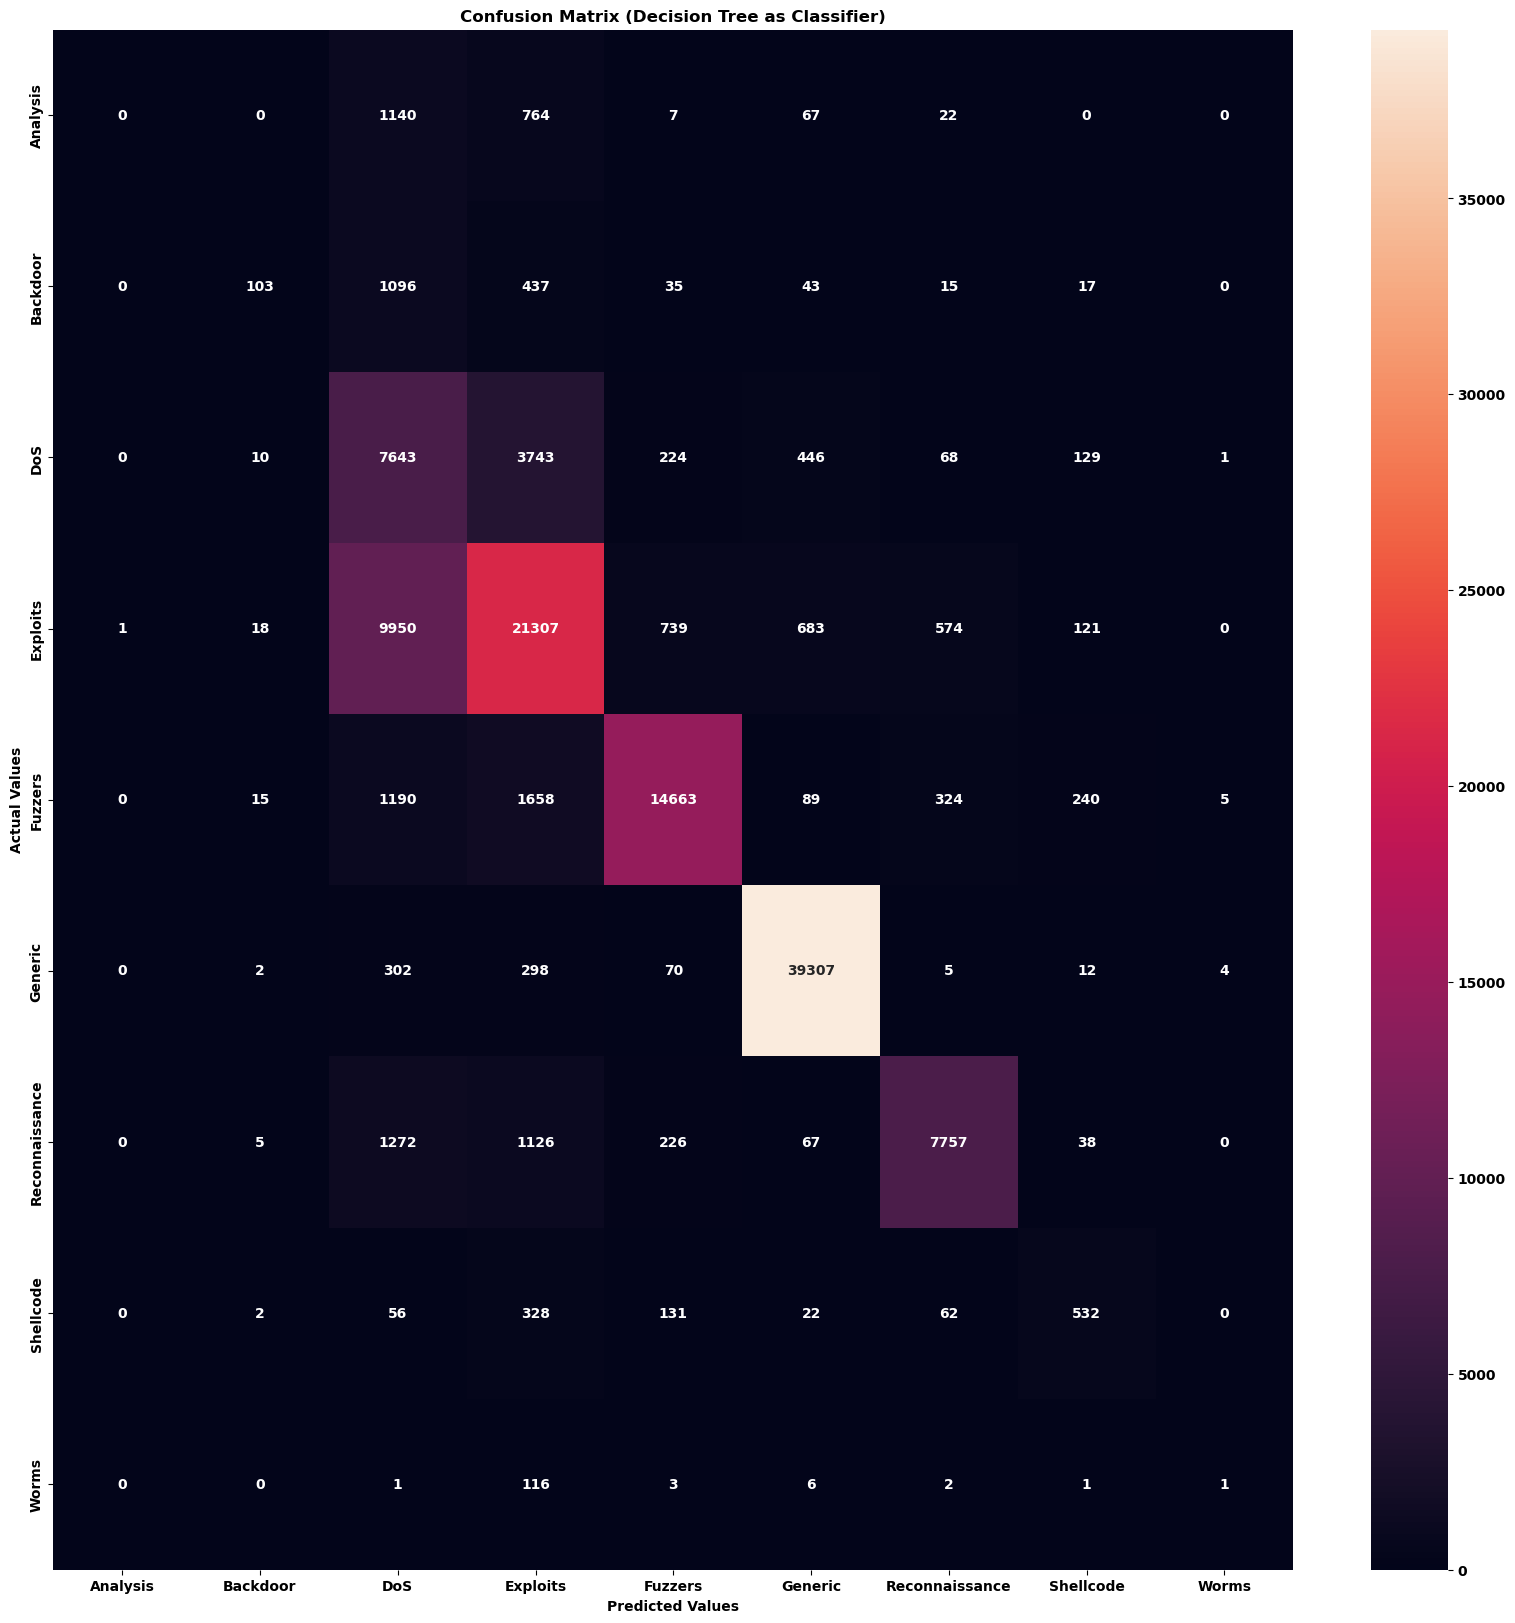

In [18]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Decision Tree as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [19]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.0
Backdoor: 0.05899198167239404
DoS: 0.6232061317677756
Exploits: 0.6380678585332256
Fuzzers: 0.8063682358117026
Generic: 0.982675
Reconnaissance: 0.7393956724811743
Shellcode: 0.46954986760812
Worms: 0.007692307692307693


### Random Forest

In [20]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_ranfor)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

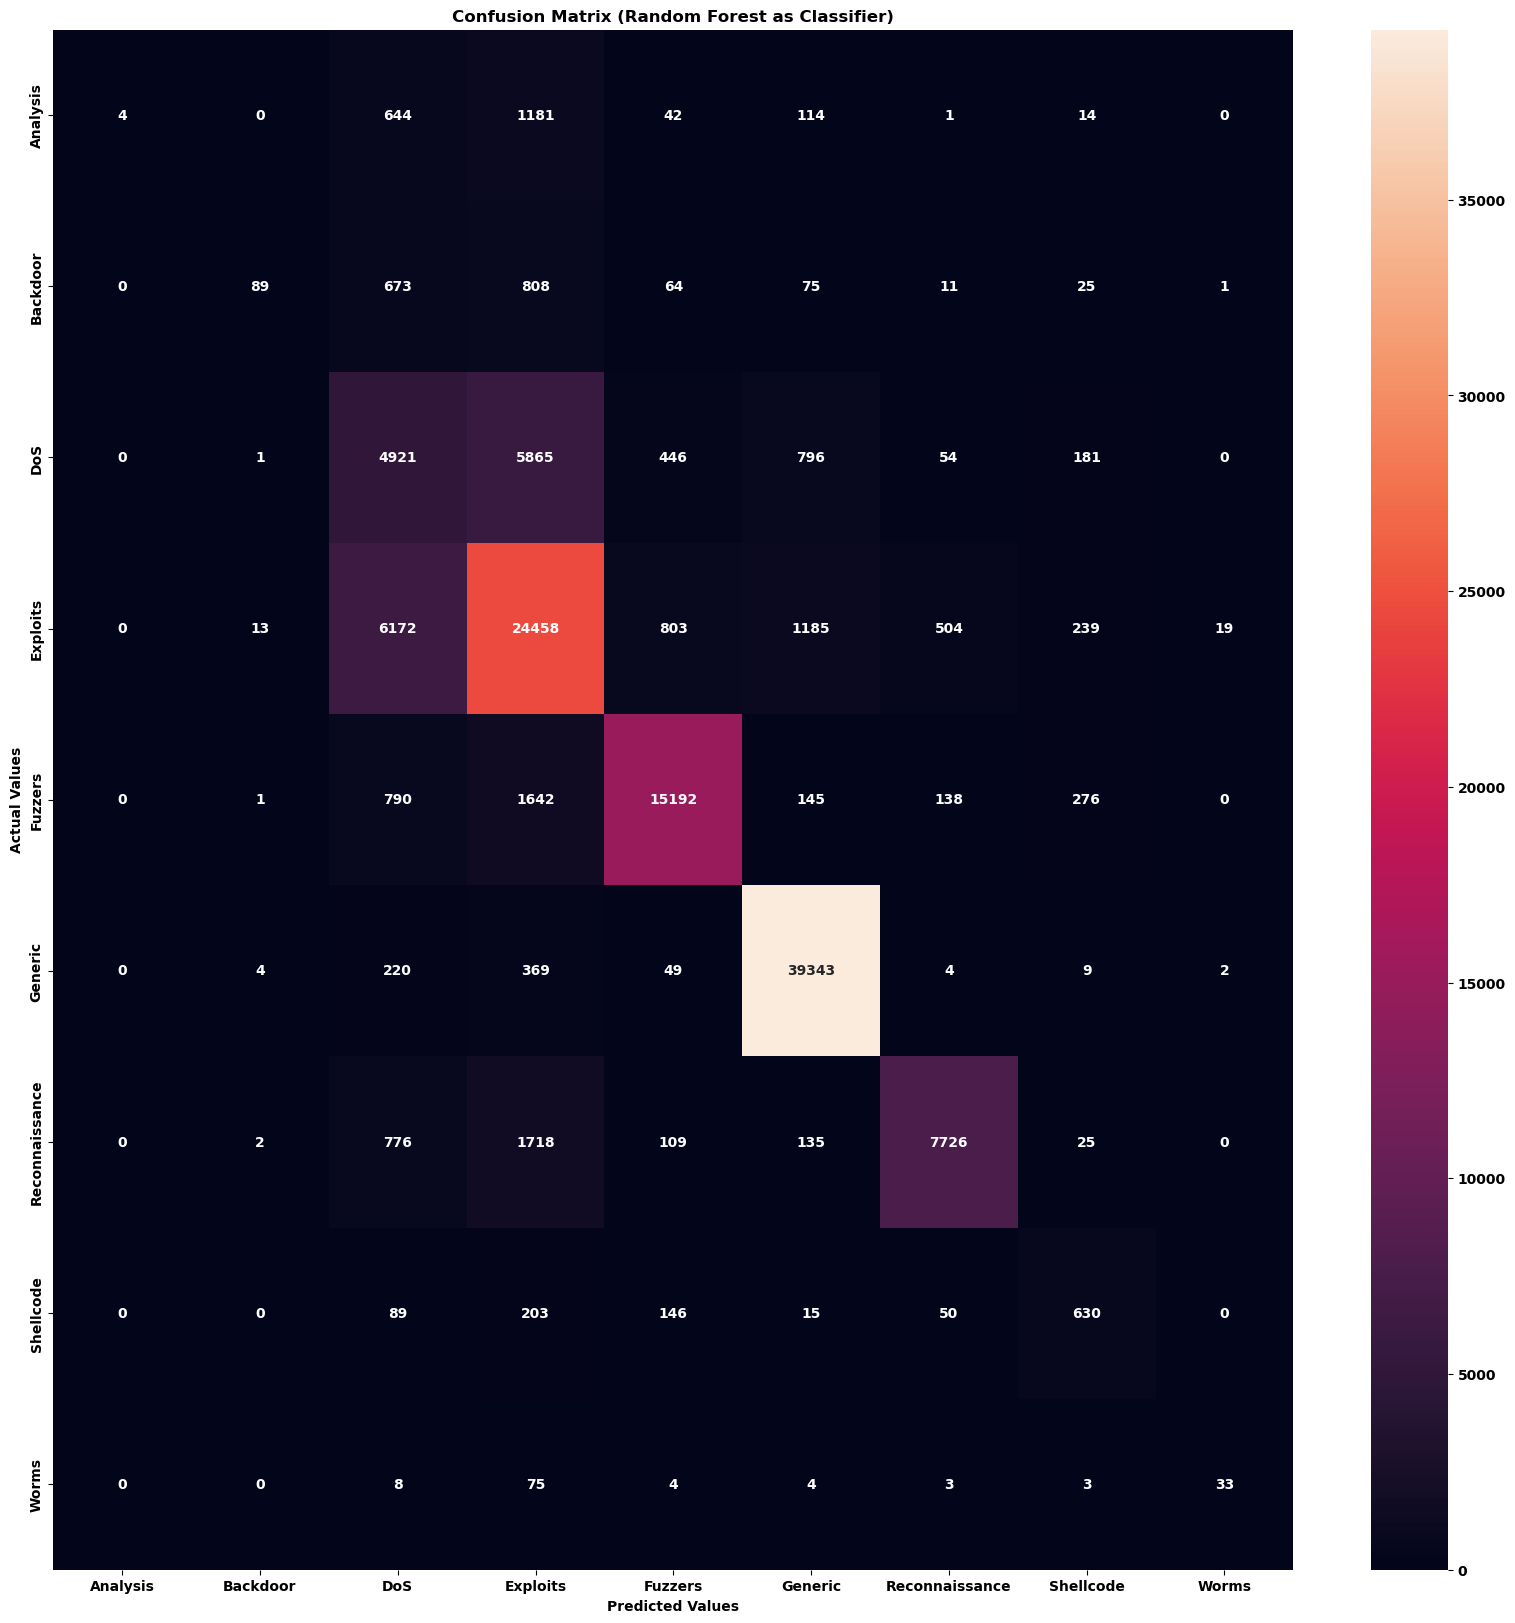

In [21]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Random Forest as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [22]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.002
Backdoor: 0.05097365406643757
DoS: 0.4012557077625571
Exploits: 0.7324289521756057
Fuzzers: 0.8354597448306204
Generic: 0.983575
Reconnaissance: 0.7364407587455915
Shellcode: 0.556045895851721
Worms: 0.25384615384615383


### Gradient Boosting

In [23]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_gbc)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

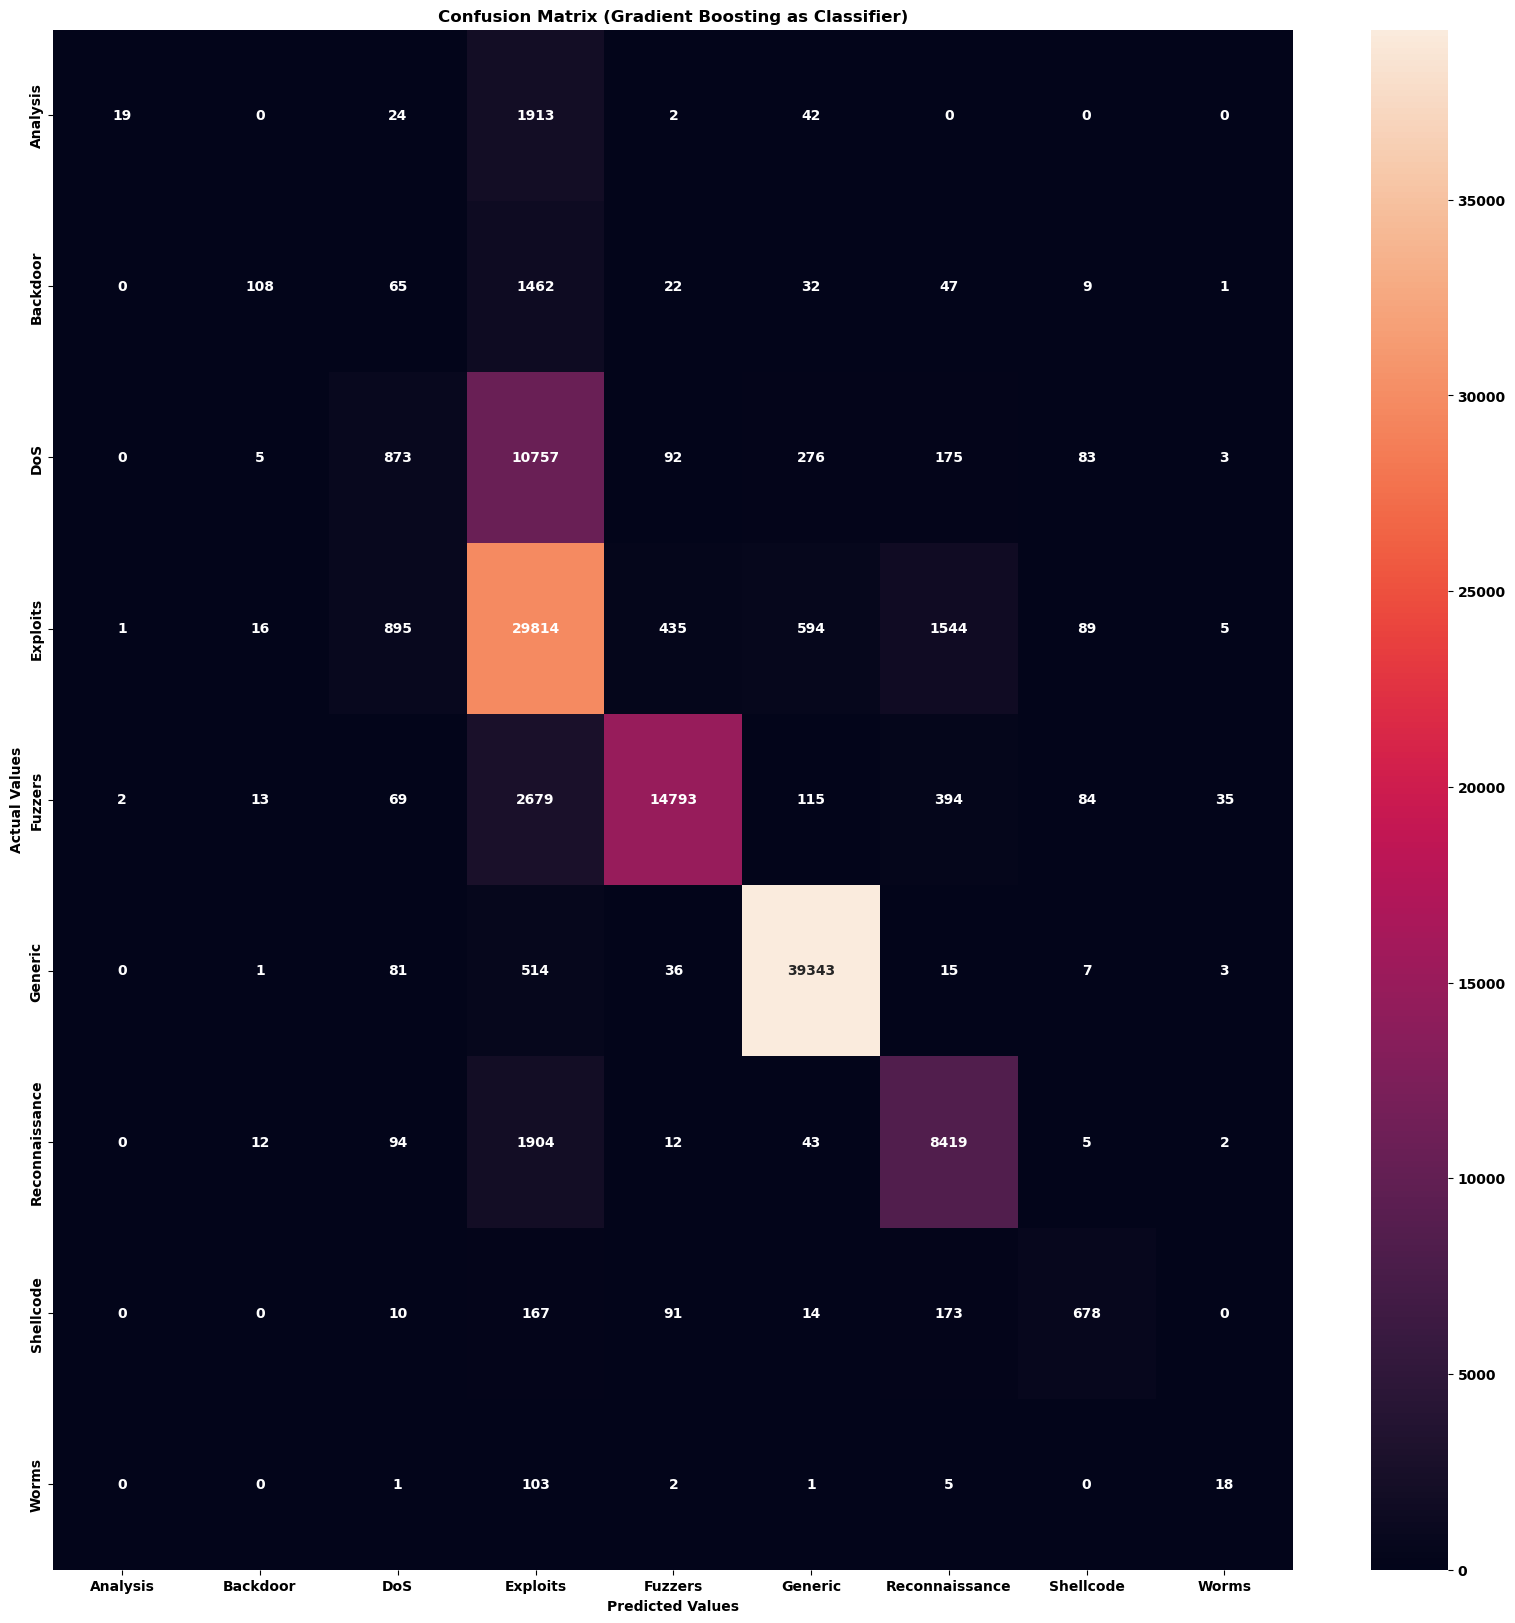

In [24]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (Gradient Boosting as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [25]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.0095
Backdoor: 0.061855670103092786
DoS: 0.0711839530332681
Exploits: 0.892821848890486
Fuzzers: 0.8135173779146503
Generic: 0.983575
Reconnaissance: 0.8024973787055572
Shellcode: 0.5984112974404237
Worms: 0.13846153846153847


### XGBoost

In [26]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, p_test_xgb)
matrix_df = pd.DataFrame(matrix, 
                         index= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'], 
                         columns= ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'])

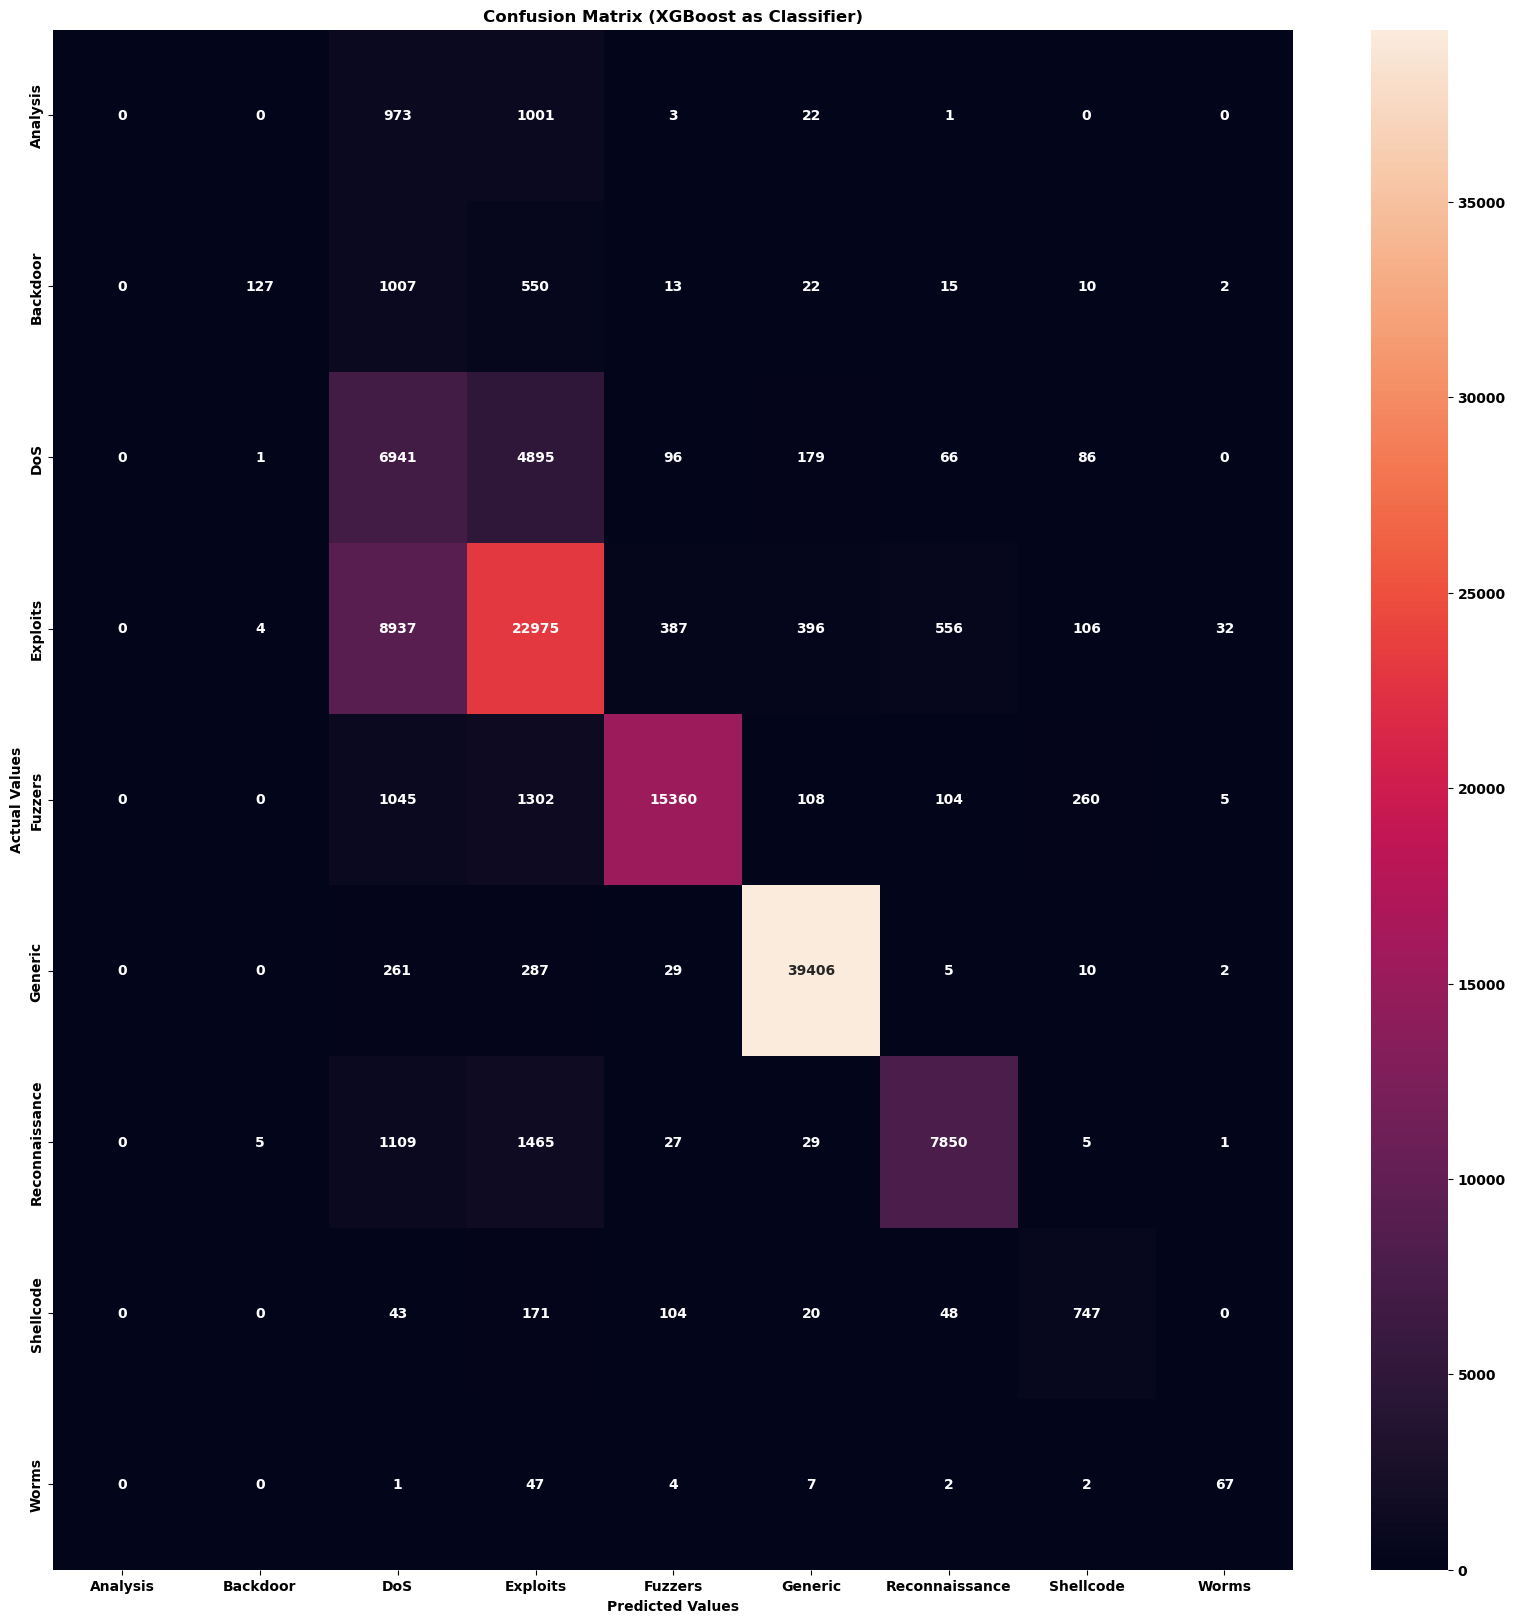

In [27]:
# Plotting Confusion Matrix
plt.figure(figsize = (20, 20))
sns.heatmap(matrix_df, fmt='.0f', annot=True)
plt.title('Confusion Matrix (XGBoost as Classifier)')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [28]:
recalls = calculate_recall(matrix)
display_recall(recalls)

Recall Scores for each class:
Analysis: 0.0
Backdoor: 0.072737686139748
DoS: 0.5659654272667971
Exploits: 0.688018446979906
Fuzzers: 0.8446986361636604
Generic: 0.98515
Reconnaissance: 0.748260413687923
Shellcode: 0.6593115622241836
Worms: 0.5153846153846153
